# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score, classification_report
from sklearn.model_selection import cross_validate
from sklearn.inspection import permutation_importance
from  sklearn  import  set_config
set_config(display='diagram')

In [4]:
from flaml import AutoML
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

# Custom functions

In [5]:
def classificator_performance(y, y_pred, target_names):
    return print(classification_report(y, y_pred, target_names=target_names))  

In [6]:
def classificator_analysis(y_pred, y_pred_proba):
    fig, axs = plt.subplots(1, 3, figsize=(20, 5))
    labels = list(target_classes.values())

    # Plot the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, cmap='Blues', annot=True, fmt='', xticklabels=labels, yticklabels=labels, ax=axs[0])
    axs[0].set_xlabel('Predicted')
    axs[0].set_ylabel('True')

    # Plot ROC curve
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(labels)):
        fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        sns.lineplot(x=fpr[i], y=tpr[i], label='ROC curve (class {0}) (AUC = {1:0.2f})'.format(target_classes[i], roc_auc[i]), linewidth=1.5, ax=axs[1])
    
    axs[1].set_xlim([0.0, 1.0])
    axs[1].set_ylim([0.0, 1.05])
    axs[1].set_xlabel('False Positive Rate')
    axs[1].set_ylabel('True Positive Rate')
    axs[1].legend(loc="lower right")

    # Plot Precision-Recall curve
    precision = dict()
    recall = dict()
    average_precision = dict()
    for i in range(len(labels)):
        precision[i], recall[i], _ = precision_recall_curve(y_test == i, y_pred_proba[:, i])
        average_precision[i] = average_precision_score(y_test == i, y_pred_proba[:, i])
        sns.lineplot(x=recall[i], y=precision[i], label='Precision-recall curve (class {0}) (AP = {1:0.2f})'.format(target_classes[i], average_precision[i]), linewidth=1.5, ax=axs[2])
    
    axs[2].set_xlim([0.0, 1.0])
    axs[2].set_ylim([0.0, 1.05])
    axs[2].set_xlabel('Recall')
    axs[2].set_ylabel('Precision')
    axs[2].legend(loc="lower left")

    return plt.show()

In [7]:
def features_importance(model, X_test, y_test, n_repeats):
    result = permutation_importance(estimator=model,X=X_test, y=y_test, n_repeats=n_repeats, n_jobs=-1, random_state=13)
    features_rank  = pd.DataFrame(result['importances'].T,  columns=data_frame.columns[:-1]).sort_values(by=0, axis=1, ascending=False)    
    plt.figure(figsize=(10, 7))
    plt.grid(axis='x', linestyle='--', linewidth=0.8)
    sns.barplot(data=features_rank, orient='h')
    
    return  plt.show()

# Loading data

In [8]:
with open('airline_dataset.pkl', 'rb') as f:
    data = pickle.load(f)

In [9]:
X, y = data

In [10]:
y

array([0, 0, 1, ..., 0, 1, 0])

In [11]:
with open('airline_df_processed.pkl', 'rb') as f:
    data_frame = pickle.load(f)

In [12]:
data_frame 

,Gender_Female,Gender_Male,customer_type_Loyal Customer,customer_type_disloyal Customer,type_of_travel_Business travel,type_of_travel_Personal Travel,customer_class_Business,customer_class_Eco,customer_class_Eco Plus,age,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,-1.748219,...,1.230701,0.479240,-0.266751,0.311941,0.547933,1.153847,1.304624,0.273026,0.075623,0
1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,-0.954439,...,-1.767475,-1.851712,1.252860,-0.535461,-1.821471,0.303947,-1.740400,-0.359673,-0.236345,0
2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.888290,...,1.230701,0.479240,-0.266751,0.311941,0.547933,0.303947,1.304624,-0.386036,-0.392329,1
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.954439,...,-1.017931,-1.074728,1.252860,-0.535461,-1.821471,0.303947,-0.979144,-0.096049,-0.158353,0
4,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.426902,...,-0.268387,-0.297744,0.493055,0.311941,-0.241868,-0.545953,-0.217888,-0.386036,-0.392329,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129482,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,-0.359104,...,0.481157,-0.297744,-1.026556,0.311941,0.547933,1.153847,0.543368,-0.386036,-0.392329,0
129483,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,-1.086735,...,0.481157,0.479240,1.252860,1.159342,1.337734,1.153847,0.543368,-0.386036,-0.392329,1
129484,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,-1.483625,...,-1.017931,0.479240,-0.266751,0.311941,1.337734,0.303947,-0.979144,-0.386036,-0.392329,0
129485,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,-1.682070,...,0.481157,-0.297744,-1.026556,1.159342,0.547933,1.153847,0.543368,-0.386036,-0.392329,1


In [13]:
with open('airline_satisfaction_classes.pkl', 'rb') as f:
    target_classes = pickle.load(f)

In [14]:
target_classes

{0: 'neutral or dissatisfied', 1: 'satisfied'}

In [15]:
labels = list(target_classes.values())

In [16]:
labels

['neutral or dissatisfied', 'satisfied']

# Train Test Split Dataset

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

# FLAML 

In [18]:
automl = AutoML()

In [19]:
automl.fit(
            X_train, y_train,
            task = "classification",
            metric = 'accuracy',
            estimator_list = ['lgbm', 'xgboost', 'catboost'],
            log_file_name = 'airline.log',  
            time_budget = 900
          )

[flaml.automl.automl: 04-03 18:01:48] {2726} INFO - task = classification
[flaml.automl.automl: 04-03 18:01:48] {2728} INFO - Data split method: stratified
[flaml.automl.automl: 04-03 18:01:48] {2731} INFO - Evaluation method: holdout
[flaml.automl.automl: 04-03 18:01:48] {2858} INFO - Minimizing error metric: 1-accuracy
[flaml.automl.automl: 04-03 18:01:48] {3004} INFO - List of ML learners in AutoML Run: ['lgbm', 'xgboost', 'catboost']
[flaml.automl.automl: 04-03 18:01:48] {3334} INFO - iteration 0, current learner lgbm
[flaml.automl.automl: 04-03 18:01:48] {3472} INFO - Estimated sufficient time budget=2344s. Estimated necessary time budget=4s.
[flaml.automl.automl: 04-03 18:01:48] {3519} INFO -  at 0.1s,	estimator lgbm's best error=0.1594,	best estimator lgbm's best error=0.1594
[flaml.automl.automl: 04-03 18:01:48] {3334} INFO - iteration 1, current learner lgbm
[flaml.automl.automl: 04-03 18:01:48] {3519} INFO -  at 0.2s,	estimator lgbm's best error=0.1594,	best estimator lgbm's 

[flaml.automl.automl: 04-03 18:01:55] {3334} INFO - iteration 34, current learner lgbm
[flaml.automl.automl: 04-03 18:01:56] {3519} INFO -  at 7.6s,	estimator lgbm's best error=0.0406,	best estimator lgbm's best error=0.0406
[flaml.automl.automl: 04-03 18:01:56] {3334} INFO - iteration 35, current learner catboost
[flaml.automl.automl: 04-03 18:01:56] {3519} INFO -  at 8.5s,	estimator catboost's best error=0.0425,	best estimator lgbm's best error=0.0406
[flaml.automl.automl: 04-03 18:01:56] {3334} INFO - iteration 36, current learner lgbm
[flaml.automl.automl: 04-03 18:01:58] {3519} INFO -  at 9.7s,	estimator lgbm's best error=0.0338,	best estimator lgbm's best error=0.0338
[flaml.automl.automl: 04-03 18:01:58] {3334} INFO - iteration 37, current learner lgbm
[flaml.automl.automl: 04-03 18:01:58] {3519} INFO -  at 10.2s,	estimator lgbm's best error=0.0338,	best estimator lgbm's best error=0.0338
[flaml.automl.automl: 04-03 18:01:58] {3334} INFO - iteration 38, current learner lgbm
[fla

[flaml.automl.automl: 04-03 18:03:51] {3334} INFO - iteration 70, current learner lgbm
[flaml.automl.automl: 04-03 18:04:15] {3519} INFO -  at 147.2s,	estimator lgbm's best error=0.0335,	best estimator lgbm's best error=0.0335
[flaml.automl.automl: 04-03 18:04:15] {3334} INFO - iteration 71, current learner catboost
[flaml.automl.automl: 04-03 18:04:56] {3519} INFO -  at 188.1s,	estimator catboost's best error=0.0346,	best estimator lgbm's best error=0.0335
[flaml.automl.automl: 04-03 18:04:56] {3334} INFO - iteration 72, current learner catboost
[flaml.automl.automl: 04-03 18:06:43] {3519} INFO -  at 295.1s,	estimator catboost's best error=0.0343,	best estimator lgbm's best error=0.0335
[flaml.automl.automl: 04-03 18:06:43] {3334} INFO - iteration 73, current learner catboost
[flaml.automl.automl: 04-03 18:06:56] {3519} INFO -  at 308.3s,	estimator catboost's best error=0.0342,	best estimator lgbm's best error=0.0335
[flaml.automl.automl: 04-03 18:06:56] {3334} INFO - iteration 74, cu

[flaml.automl.automl: 04-03 18:13:43] {3334} INFO - iteration 106, current learner xgboost
[flaml.automl.automl: 04-03 18:13:44] {3519} INFO -  at 716.2s,	estimator xgboost's best error=0.0364,	best estimator lgbm's best error=0.0335
[flaml.automl.automl: 04-03 18:13:44] {3334} INFO - iteration 107, current learner xgboost
[flaml.automl.automl: 04-03 18:13:54] {3519} INFO -  at 725.9s,	estimator xgboost's best error=0.0364,	best estimator lgbm's best error=0.0335
[flaml.automl.automl: 04-03 18:13:54] {3334} INFO - iteration 108, current learner xgboost
[flaml.automl.automl: 04-03 18:13:55] {3519} INFO -  at 727.5s,	estimator xgboost's best error=0.0364,	best estimator lgbm's best error=0.0335
[flaml.automl.automl: 04-03 18:13:55] {3334} INFO - iteration 109, current learner lgbm
[flaml.automl.automl: 04-03 18:14:01] {3519} INFO -  at 733.4s,	estimator lgbm's best error=0.0335,	best estimator lgbm's best error=0.0335
[flaml.automl.automl: 04-03 18:14:01] {3334} INFO - iteration 110, cur

In [20]:
automl.best_config_per_estimator

{'lgbm': {'n_estimators': 592,
  'num_leaves': 289,
  'min_child_samples': 8,
  'learning_rate': 0.06361470692771837,
  'log_max_bin': 8,
  'colsample_bytree': 0.7455266895471486,
  'reg_alpha': 0.002012266447963432,
  'reg_lambda': 0.00698919019897823},
 'xgboost': {'n_estimators': 156,
  'max_leaves': 331,
  'min_child_weight': 0.5223402806025385,
  'learning_rate': 0.023913168329555652,
  'subsample': 0.9502558281139291,
  'colsample_bylevel': 0.3676083697960033,
  'colsample_bytree': 0.7963894631226762,
  'reg_alpha': 0.11355657310742334,
  'reg_lambda': 2.2377911897706007},
 'catboost': {'early_stopping_rounds': 10,
  'learning_rate': 0.02787048540488597,
  'n_estimators': 878}}

# Logistic Regression (benchmark)

In [21]:
model_LG = LogisticRegression(n_jobs=-1)
model_LG.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': -1,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [22]:
model_LG.fit(X_train, y_train)

LogisticRegression(n_jobs=-1)

In [23]:
y_predict_LG_test = model_LG.predict(X_test)
y_predict_LG_train = model_LG.predict(X_train)
y_pred_proba_LG_test = model_LG.predict_proba(X_test)
y_pred_proba_LG_train = model_LG.predict_proba(X_train)

In [24]:
accuracy_LG_test = accuracy_score(y_test, y_predict_LG_test)
accuracy_LG_train = accuracy_score(y_train, y_predict_LG_train)

## accuracy score

In [25]:
accuracy_LG_test, accuracy_LG_train

(0.8751769763430896, 0.8742828773168579)

# CATBoost 

In [26]:
params_automl_CAT = automl.best_config_per_estimator['catboost']

In [27]:
params_automl_CAT

{'early_stopping_rounds': 10,
 'learning_rate': 0.02787048540488597,
 'n_estimators': 878}

In [28]:
model_CAT = CatBoostClassifier(**params_automl_CAT, thread_count=-1)
model_CAT.get_params()

{'learning_rate': 0.02787048540488597,
 'n_estimators': 878,
 'early_stopping_rounds': 10}

In [29]:
model_CAT.fit(X_train, y_train)

0:	learn: 0.6538231	total: 15.9ms	remaining: 13.9s
1:	learn: 0.6183023	total: 31.5ms	remaining: 13.8s
2:	learn: 0.5853917	total: 46.9ms	remaining: 13.7s
3:	learn: 0.5558774	total: 62.3ms	remaining: 13.6s
4:	learn: 0.5163913	total: 78.5ms	remaining: 13.7s
5:	learn: 0.4922802	total: 94.2ms	remaining: 13.7s
6:	learn: 0.4630144	total: 111ms	remaining: 13.8s
7:	learn: 0.4433419	total: 127ms	remaining: 13.8s
8:	learn: 0.4231671	total: 143ms	remaining: 13.8s
9:	learn: 0.4033177	total: 159ms	remaining: 13.8s
10:	learn: 0.3831399	total: 175ms	remaining: 13.8s
11:	learn: 0.3695823	total: 191ms	remaining: 13.8s
12:	learn: 0.3586164	total: 207ms	remaining: 13.8s
13:	learn: 0.3483359	total: 226ms	remaining: 14s
14:	learn: 0.3357330	total: 243ms	remaining: 14s
15:	learn: 0.3265451	total: 260ms	remaining: 14s
16:	learn: 0.3153852	total: 276ms	remaining: 14s
17:	learn: 0.3074441	total: 293ms	remaining: 14s
18:	learn: 0.2999673	total: 309ms	remaining: 14s
19:	learn: 0.2929453	total: 326ms	remaining: 14

168:	learn: 0.1195481	total: 2.71s	remaining: 11.4s
169:	learn: 0.1194830	total: 2.72s	remaining: 11.3s
170:	learn: 0.1193490	total: 2.74s	remaining: 11.3s
171:	learn: 0.1191458	total: 2.75s	remaining: 11.3s
172:	learn: 0.1186841	total: 2.77s	remaining: 11.3s
173:	learn: 0.1185106	total: 2.79s	remaining: 11.3s
174:	learn: 0.1184021	total: 2.8s	remaining: 11.3s
175:	learn: 0.1182707	total: 2.81s	remaining: 11.2s
176:	learn: 0.1181119	total: 2.83s	remaining: 11.2s
177:	learn: 0.1179599	total: 2.85s	remaining: 11.2s
178:	learn: 0.1177306	total: 2.86s	remaining: 11.2s
179:	learn: 0.1173955	total: 2.88s	remaining: 11.2s
180:	learn: 0.1171624	total: 2.89s	remaining: 11.1s
181:	learn: 0.1169788	total: 2.91s	remaining: 11.1s
182:	learn: 0.1168642	total: 2.92s	remaining: 11.1s
183:	learn: 0.1168103	total: 2.94s	remaining: 11.1s
184:	learn: 0.1164541	total: 2.95s	remaining: 11.1s
185:	learn: 0.1163019	total: 2.97s	remaining: 11s
186:	learn: 0.1161953	total: 2.98s	remaining: 11s
187:	learn: 0.116

330:	learn: 0.0991787	total: 5.22s	remaining: 8.64s
331:	learn: 0.0991382	total: 5.25s	remaining: 8.64s
332:	learn: 0.0990637	total: 5.27s	remaining: 8.62s
333:	learn: 0.0990169	total: 5.28s	remaining: 8.61s
334:	learn: 0.0988757	total: 5.3s	remaining: 8.59s
335:	learn: 0.0987523	total: 5.31s	remaining: 8.57s
336:	learn: 0.0985748	total: 5.33s	remaining: 8.56s
337:	learn: 0.0985225	total: 5.35s	remaining: 8.54s
338:	learn: 0.0984389	total: 5.36s	remaining: 8.53s
339:	learn: 0.0983686	total: 5.38s	remaining: 8.51s
340:	learn: 0.0983152	total: 5.39s	remaining: 8.49s
341:	learn: 0.0982727	total: 5.41s	remaining: 8.47s
342:	learn: 0.0982073	total: 5.42s	remaining: 8.46s
343:	learn: 0.0981432	total: 5.44s	remaining: 8.45s
344:	learn: 0.0981142	total: 5.46s	remaining: 8.43s
345:	learn: 0.0980291	total: 5.47s	remaining: 8.41s
346:	learn: 0.0979660	total: 5.49s	remaining: 8.39s
347:	learn: 0.0979386	total: 5.5s	remaining: 8.38s
348:	learn: 0.0978647	total: 5.51s	remaining: 8.36s
349:	learn: 0.

494:	learn: 0.0904092	total: 7.75s	remaining: 6s
495:	learn: 0.0903786	total: 7.76s	remaining: 5.98s
496:	learn: 0.0903053	total: 7.78s	remaining: 5.96s
497:	learn: 0.0902902	total: 7.79s	remaining: 5.95s
498:	learn: 0.0902536	total: 7.81s	remaining: 5.93s
499:	learn: 0.0902103	total: 7.83s	remaining: 5.92s
500:	learn: 0.0901701	total: 7.84s	remaining: 5.9s
501:	learn: 0.0901493	total: 7.86s	remaining: 5.88s
502:	learn: 0.0901056	total: 7.87s	remaining: 5.87s
503:	learn: 0.0900840	total: 7.89s	remaining: 5.85s
504:	learn: 0.0900381	total: 7.9s	remaining: 5.84s
505:	learn: 0.0900148	total: 7.92s	remaining: 5.82s
506:	learn: 0.0900060	total: 7.93s	remaining: 5.8s
507:	learn: 0.0899922	total: 7.94s	remaining: 5.79s
508:	learn: 0.0899446	total: 7.96s	remaining: 5.77s
509:	learn: 0.0899107	total: 7.98s	remaining: 5.75s
510:	learn: 0.0898580	total: 7.99s	remaining: 5.74s
511:	learn: 0.0898259	total: 8.01s	remaining: 5.72s
512:	learn: 0.0897799	total: 8.02s	remaining: 5.71s
513:	learn: 0.0897

658:	learn: 0.0850043	total: 10.3s	remaining: 3.41s
659:	learn: 0.0849887	total: 10.3s	remaining: 3.4s
660:	learn: 0.0849793	total: 10.3s	remaining: 3.38s
661:	learn: 0.0849591	total: 10.3s	remaining: 3.37s
662:	learn: 0.0849327	total: 10.3s	remaining: 3.35s
663:	learn: 0.0849073	total: 10.3s	remaining: 3.33s
664:	learn: 0.0848901	total: 10.4s	remaining: 3.32s
665:	learn: 0.0848797	total: 10.4s	remaining: 3.3s
666:	learn: 0.0848652	total: 10.4s	remaining: 3.29s
667:	learn: 0.0848270	total: 10.4s	remaining: 3.27s
668:	learn: 0.0848046	total: 10.4s	remaining: 3.25s
669:	learn: 0.0847604	total: 10.4s	remaining: 3.24s
670:	learn: 0.0847378	total: 10.5s	remaining: 3.22s
671:	learn: 0.0847299	total: 10.5s	remaining: 3.21s
672:	learn: 0.0846529	total: 10.5s	remaining: 3.19s
673:	learn: 0.0846416	total: 10.5s	remaining: 3.18s
674:	learn: 0.0846277	total: 10.5s	remaining: 3.16s
675:	learn: 0.0846007	total: 10.5s	remaining: 3.15s
676:	learn: 0.0845719	total: 10.5s	remaining: 3.13s
677:	learn: 0.

824:	learn: 0.0806937	total: 12.8s	remaining: 824ms
825:	learn: 0.0806693	total: 12.8s	remaining: 808ms
826:	learn: 0.0806646	total: 12.8s	remaining: 792ms
827:	learn: 0.0806528	total: 12.9s	remaining: 777ms
828:	learn: 0.0806403	total: 12.9s	remaining: 761ms
829:	learn: 0.0806277	total: 12.9s	remaining: 746ms
830:	learn: 0.0805986	total: 12.9s	remaining: 730ms
831:	learn: 0.0805840	total: 12.9s	remaining: 715ms
832:	learn: 0.0805697	total: 12.9s	remaining: 699ms
833:	learn: 0.0804999	total: 13s	remaining: 683ms
834:	learn: 0.0804840	total: 13s	remaining: 668ms
835:	learn: 0.0804720	total: 13s	remaining: 652ms
836:	learn: 0.0804408	total: 13s	remaining: 637ms
837:	learn: 0.0804186	total: 13s	remaining: 621ms
838:	learn: 0.0803985	total: 13s	remaining: 606ms
839:	learn: 0.0803846	total: 13s	remaining: 590ms
840:	learn: 0.0803712	total: 13.1s	remaining: 575ms
841:	learn: 0.0803526	total: 13.1s	remaining: 559ms
842:	learn: 0.0803171	total: 13.1s	remaining: 544ms
843:	learn: 0.0802971	tota

In [30]:
y_predict_CAT_test = model_CAT.predict(X_test)
y_predict_CAT_train = model_CAT.predict(X_train)
y_pred_proba_CAT_test = model_CAT.predict_proba(X_test)
y_pred_proba_CAT_train = model_CAT.predict_proba(X_train)

In [31]:
accuracy_CAT_test = accuracy_score(y_test, y_predict_CAT_test)
accuracy_CAT_train = accuracy_score(y_train, y_predict_CAT_train)

## accuracy score

In [32]:
accuracy_CAT_test, accuracy_CAT_train

(0.9638839550029603, 0.9673764342453662)

# XGBoost

In [33]:
params_automl_XGB = automl.best_config_per_estimator['xgboost']

In [34]:
params_automl_XGB

{'n_estimators': 156,
 'max_leaves': 331,
 'min_child_weight': 0.5223402806025385,
 'learning_rate': 0.023913168329555652,
 'subsample': 0.9502558281139291,
 'colsample_bylevel': 0.3676083697960033,
 'colsample_bytree': 0.7963894631226762,
 'reg_alpha': 0.11355657310742334,
 'reg_lambda': 2.2377911897706007}

In [35]:
model_XGB = XGBClassifier(**params_automl_XGB, n_jobs=-1)
model_XGB.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': 0.3676083697960033,
 'colsample_bynode': None,
 'colsample_bytree': 0.7963894631226762,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.023913168329555652,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': 331,
 'min_child_weight': 0.5223402806025385,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 156,
 'n_jobs': -1,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': 0.11355657310742334,
 'reg_lambda': 2.2377911897706007,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': 0.9502558281139291,
 'tree_method'

In [36]:
model_XGB.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.3676083697960033, colsample_bynode=None,
              colsample_bytree=0.7963894631226762, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.023913168329555652,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=331,
              min_child_weight=0.5223402806025385, missing=nan,
              monotone_constraints=None, n_estimators=156, n_jobs=-1,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [37]:
y_predict_XGB_test = model_XGB.predict(X_test)
y_predict_XGB_train = model_XGB.predict(X_train)
y_pred_proba_XGB_test = model_XGB.predict_proba(X_test)
y_pred_proba_XGB_train = model_XGB.predict_proba(X_train)

In [38]:
accuracy_XGB_test = accuracy_score(y_test, y_predict_XGB_test)
accuracy_XGB_train = accuracy_score(y_train, y_predict_XGB_train)

## accuracy score

In [39]:
accuracy_XGB_test, accuracy_XGB_train

(0.9471773882153062, 0.9466460723742277)

# LightGBM

In [40]:
params_automl_GBM = automl.best_config_per_estimator['lgbm']

In [41]:
params_automl_GBM

{'n_estimators': 592,
 'num_leaves': 289,
 'min_child_samples': 8,
 'learning_rate': 0.06361470692771837,
 'log_max_bin': 8,
 'colsample_bytree': 0.7455266895471486,
 'reg_alpha': 0.002012266447963432,
 'reg_lambda': 0.00698919019897823}

In [42]:
params_optuna_GBM = {
     'boosting_type': 'dart',
     'n_estimators': 729,
     'min_child_samples': 5,
     'learning_rate': 0.09058025591953338,
     'num_leaves': 146,
     'colsample_bytree': 0.9773512265322472,
     'reg_alpha': 0.04836405507163106,
     'reg_lambda': 0.08467358653637265,
     'min_split_gain': 0.6060617236332217,
     'min_child_weight': 0.19214701592888236
}

In [43]:
model_GBM = LGBMClassifier(objective="binary", **params_optuna_GBM)

In [44]:
model_GBM.fit(X_train,y_train)

LGBMClassifier(boosting_type='dart', colsample_bytree=0.9773512265322472,
               learning_rate=0.09058025591953338, min_child_samples=5,
               min_child_weight=0.19214701592888236,
               min_split_gain=0.6060617236332217, n_estimators=729,
               num_leaves=146, objective='binary',
               reg_alpha=0.04836405507163106, reg_lambda=0.08467358653637265)

In [45]:
y_predict_GBM_test = model_GBM.predict(X_test)
y_predict_GBM_train = model_GBM.predict(X_train)
y_pred_proba_GBM_test = model_GBM.predict_proba(X_test)
y_pred_proba_GBM_train = model_GBM.predict_proba(X_train)

In [46]:
accuracy_GBM_test = accuracy_score(y_test, y_predict_GBM_test)
accuracy_GBM_train = accuracy_score(y_train, y_predict_GBM_train)

## accuracy score

In [47]:
accuracy_GBM_test, accuracy_GBM_train

(0.965917574072644, 0.9794682259488084)

# Accuracy rank for test dataset

In [48]:
score = pd.DataFrame(
    {
        'model':['benchmark (LG)', 'CATBoost', 'XGBoost', 'LightBGM'],
        'test_accuracy':[accuracy_LG_test, accuracy_CAT_test, accuracy_XGB_test, accuracy_GBM_test]
    }
)

In [49]:
score = score.sort_values(by='test_accuracy', ascending=False)
score = score.reset_index(drop=True)
score.index = score.index + 1

In [50]:
score

,model,test_accuracy
1,LightBGM,0.965918
2,CATBoost,0.963884
3,XGBoost,0.947177
4,benchmark (LG),0.875177


# Pecision and Recall scores analysis

## Logistic Regression (benchmark)

In [51]:
classificator_performance(y_train, y_predict_LG_train, target_classes.values())

                         precision    recall  f1-score   support

neutral or dissatisfied       0.88      0.90      0.89     51351
              satisfied       0.87      0.84      0.85     39289

               accuracy                           0.87     90640
              macro avg       0.87      0.87      0.87     90640
           weighted avg       0.87      0.87      0.87     90640



In [52]:
classificator_performance(y_test, y_predict_LG_test, target_classes.values())

                         precision    recall  f1-score   support

neutral or dissatisfied       0.88      0.91      0.89     21874
              satisfied       0.87      0.84      0.85     16973

               accuracy                           0.88     38847
              macro avg       0.87      0.87      0.87     38847
           weighted avg       0.88      0.88      0.87     38847



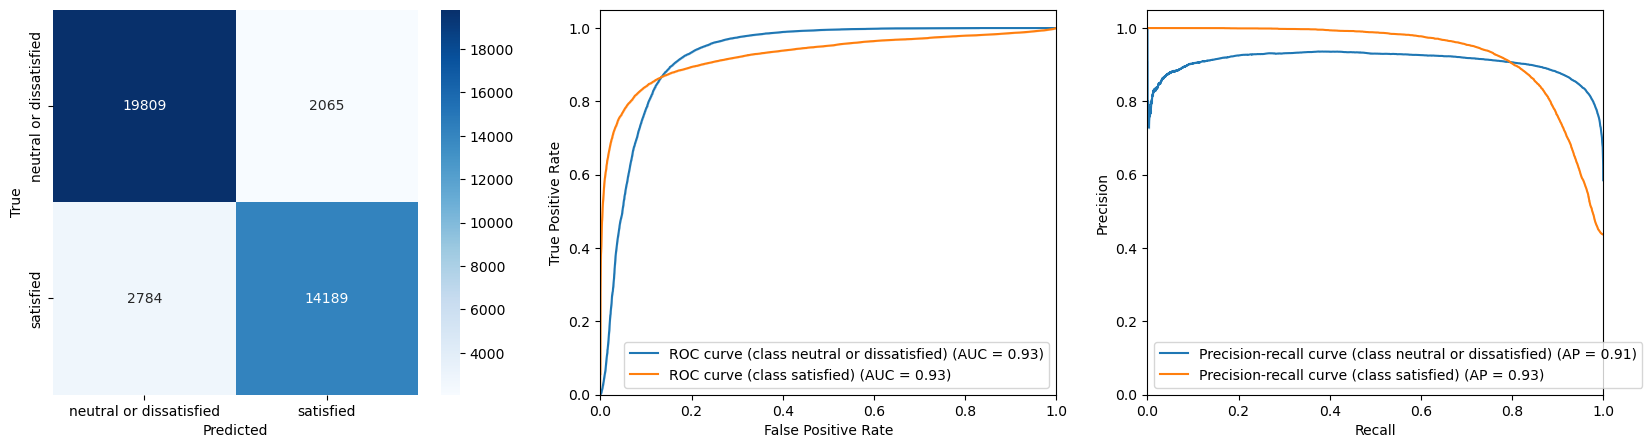

In [53]:
classificator_analysis(y_predict_LG_test, y_pred_proba_LG_test)

## CATBoost

In [54]:
classificator_performance(y_train, y_predict_CAT_train, target_classes.values())

                         precision    recall  f1-score   support

neutral or dissatisfied       0.96      0.98      0.97     51351
              satisfied       0.98      0.95      0.96     39289

               accuracy                           0.97     90640
              macro avg       0.97      0.97      0.97     90640
           weighted avg       0.97      0.97      0.97     90640



In [55]:
classificator_performance(y_test, y_predict_CAT_test, target_classes.values())

                         precision    recall  f1-score   support

neutral or dissatisfied       0.96      0.98      0.97     21874
              satisfied       0.98      0.94      0.96     16973

               accuracy                           0.96     38847
              macro avg       0.97      0.96      0.96     38847
           weighted avg       0.96      0.96      0.96     38847



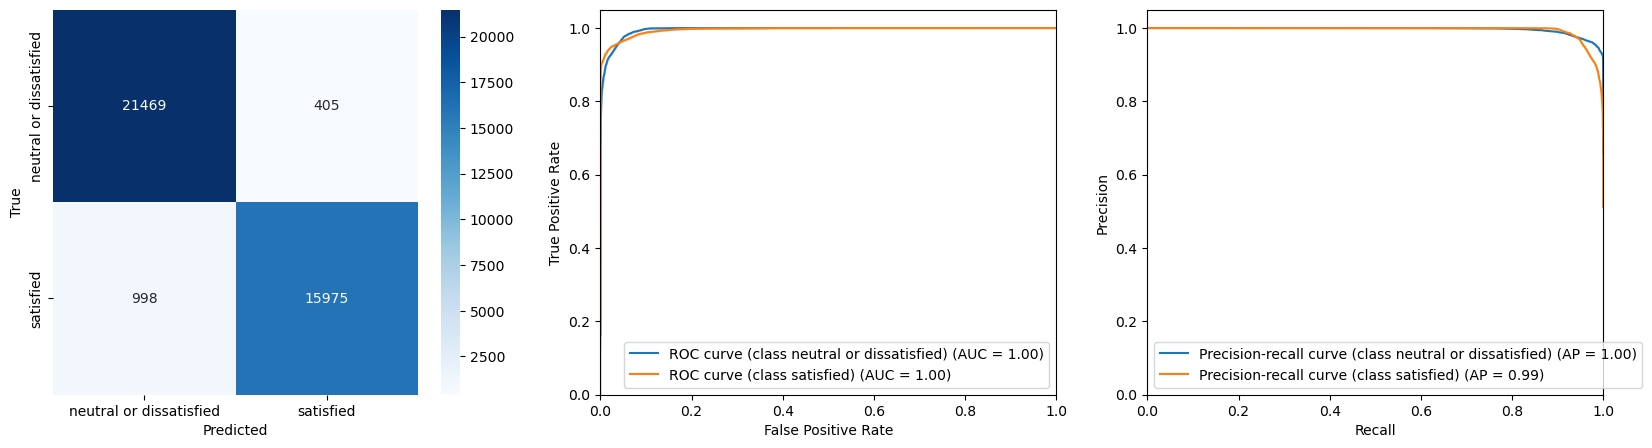

In [56]:
classificator_analysis(y_predict_CAT_test, y_pred_proba_CAT_test)

## XGBoost

In [57]:
classificator_performance(y_train, y_predict_XGB_train, target_classes.values())

                         precision    recall  f1-score   support

neutral or dissatisfied       0.94      0.96      0.95     51351
              satisfied       0.95      0.93      0.94     39289

               accuracy                           0.95     90640
              macro avg       0.95      0.94      0.95     90640
           weighted avg       0.95      0.95      0.95     90640



In [58]:
classificator_performance(y_test, y_predict_XGB_test, target_classes.values())

                         precision    recall  f1-score   support

neutral or dissatisfied       0.94      0.96      0.95     21874
              satisfied       0.95      0.93      0.94     16973

               accuracy                           0.95     38847
              macro avg       0.95      0.94      0.95     38847
           weighted avg       0.95      0.95      0.95     38847



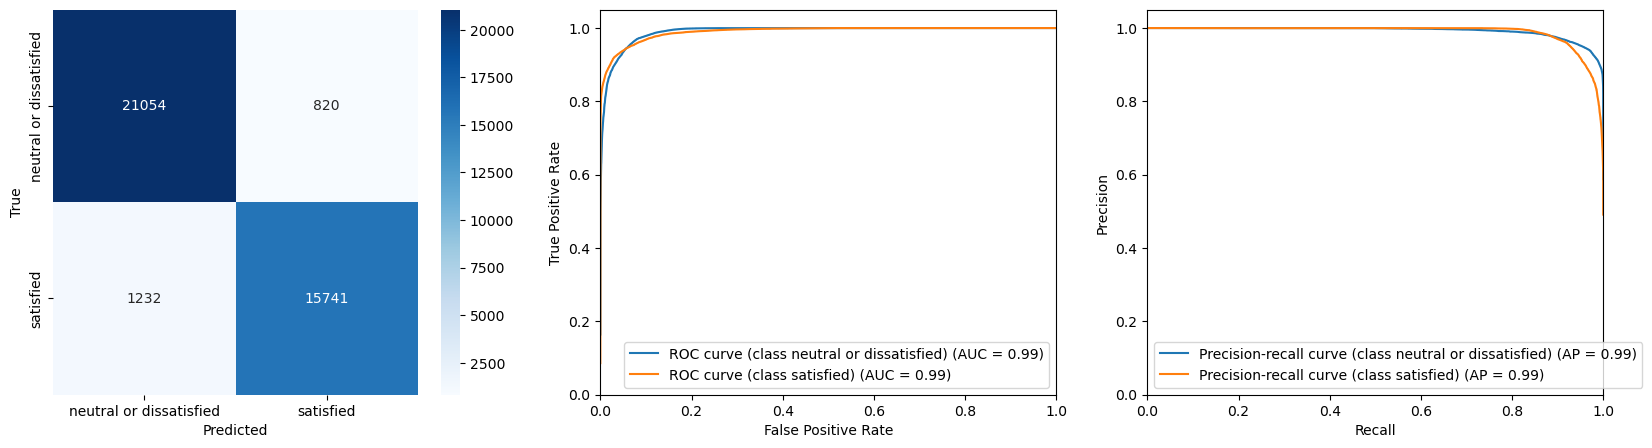

In [59]:
classificator_analysis(y_predict_XGB_test, y_pred_proba_XGB_test)

## LightGBM

In [60]:
classificator_performance(y_train, y_predict_GBM_train, target_classes.values())

                         precision    recall  f1-score   support

neutral or dissatisfied       0.97      0.99      0.98     51351
              satisfied       0.99      0.96      0.98     39289

               accuracy                           0.98     90640
              macro avg       0.98      0.98      0.98     90640
           weighted avg       0.98      0.98      0.98     90640



In [61]:
classificator_performance(y_test, y_predict_GBM_test, target_classes.values())

                         precision    recall  f1-score   support

neutral or dissatisfied       0.96      0.98      0.97     21874
              satisfied       0.98      0.94      0.96     16973

               accuracy                           0.97     38847
              macro avg       0.97      0.96      0.97     38847
           weighted avg       0.97      0.97      0.97     38847



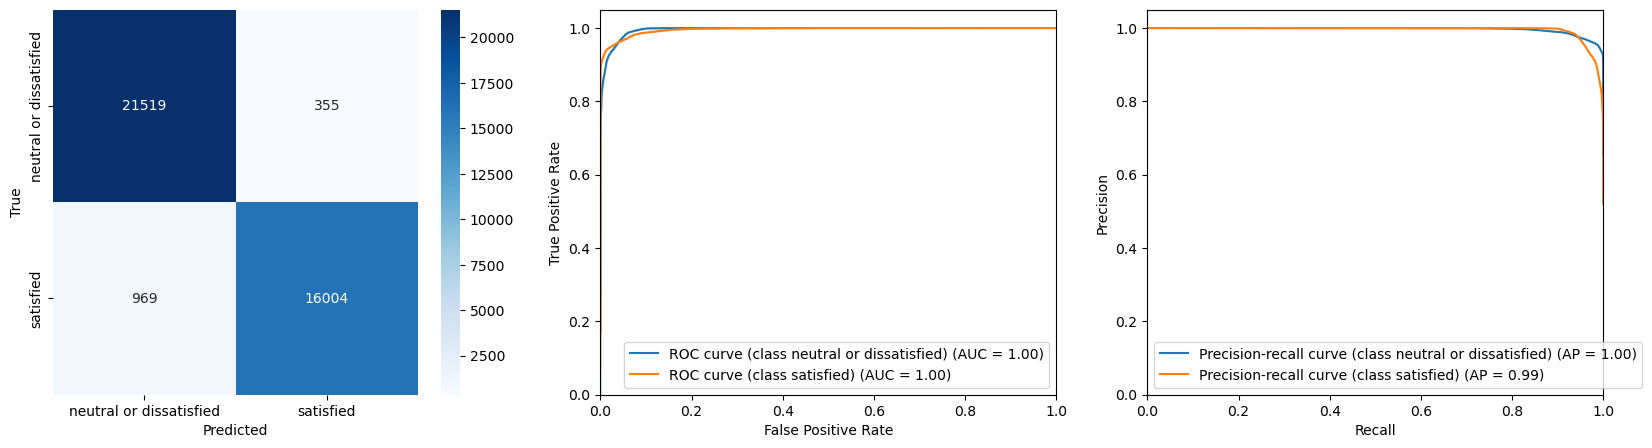

In [62]:
classificator_analysis(y_predict_GBM_test, y_pred_proba_GBM_test)

#  Features importance analysis

## Logistic Regression

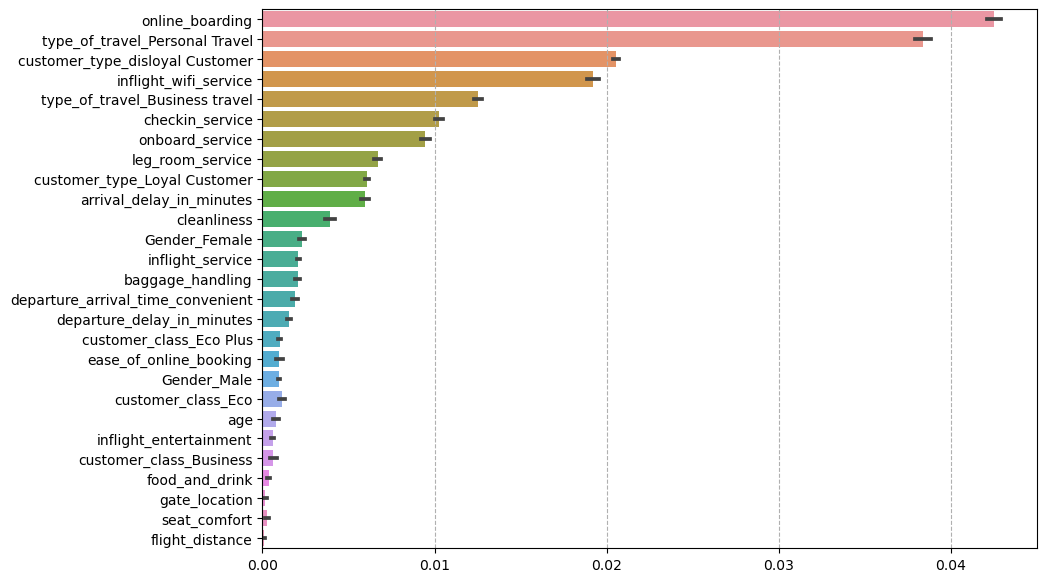

In [63]:
features_importance(model_LG, X_train, y_train, 10)

## CATBoost 

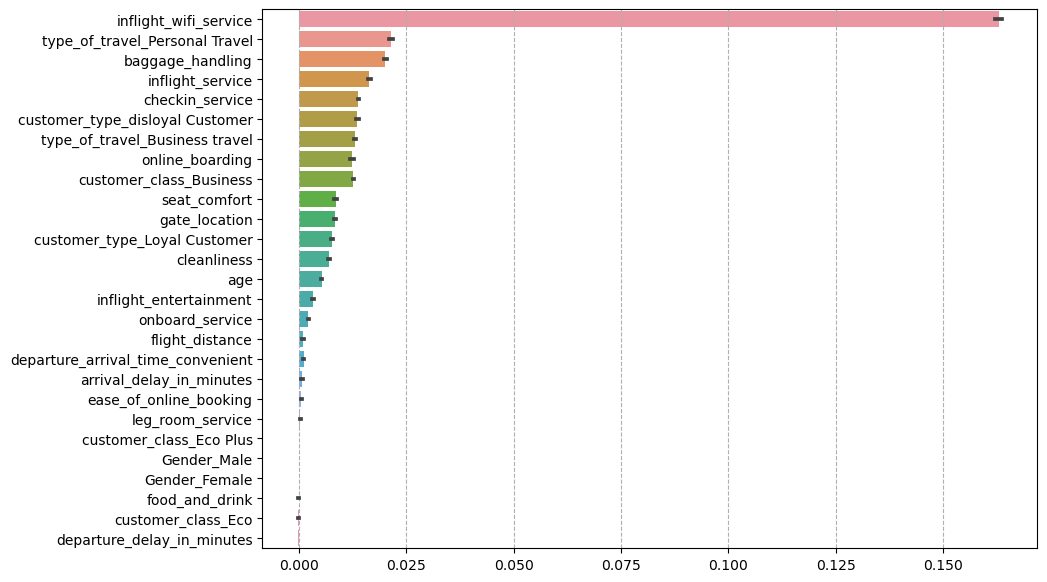

In [64]:
features_importance(model_CAT, X_test, y_test, 10)

## XGBoost

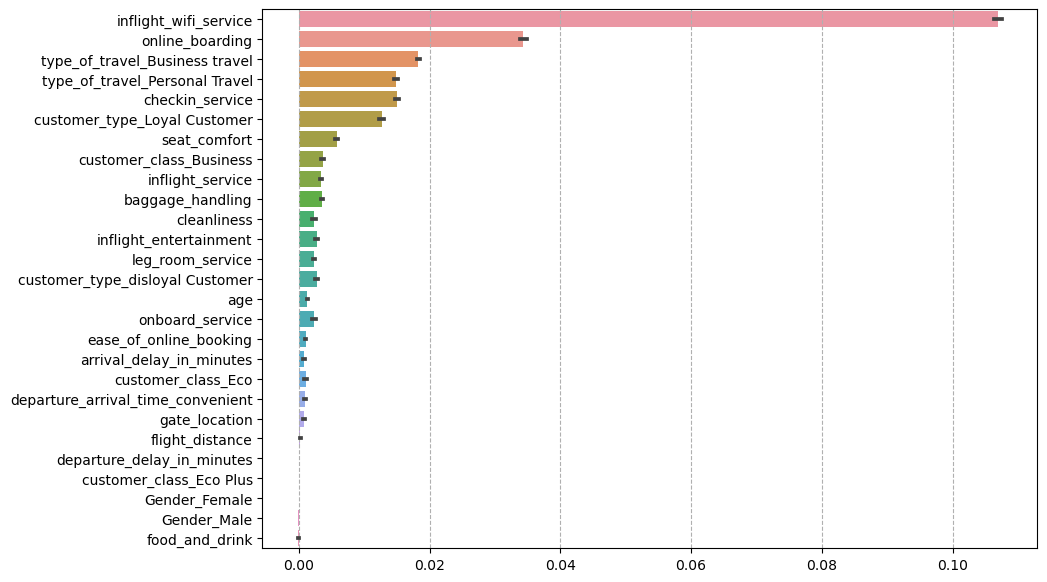

In [65]:
features_importance(model_XGB, X_test, y_test, 10)

## LightGBM

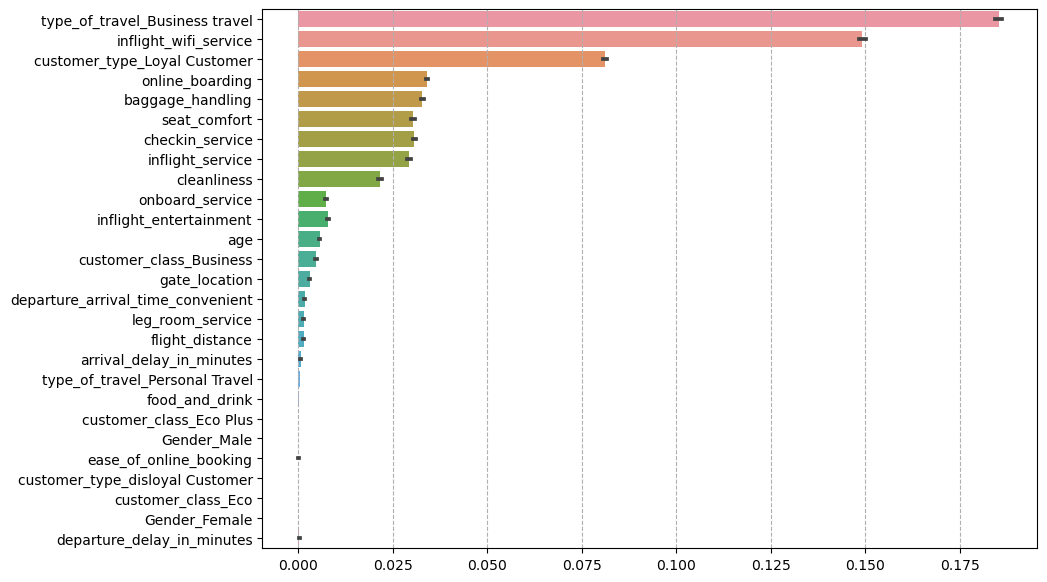

In [66]:
features_importance(model_GBM, X_test, y_test, 10)